In [3]:
import pandas as pd

# Replace 'your_file_path.parquet' with the actual path to your Parquet file
file_path = 'test-00000-of-00001.parquet'

# Read the Parquet file into a DataFrame
df_train = pd.read_parquet(file_path)

# Display the contents of the DataFrame
df_train


,index,q_id,question,best_answer,all_answers,num_answers,top_answers,num_top_answers,context,orig,target
0,107555,3didjc,Why is there so much mystery shrouding the Oor...,"You're right, in that it's still only a hypoth...","[You're right, in that it's still only a hypot...",2,"[You're right, in that it's still only a hypot...",1,<P> Investigations with the help of the x-ray...,question: Why is there so much mystery shroudi...,"answer: <P> You're right, in that it's still ..."
1,164076,1nj7l9,what is the reasoning behind lifetime salaries...,Probably something to do with how leaders stil...,[Probably something to do with how leaders sti...,2,[],0,<P> As the salaries for members of Congress a...,question: what is the reasoning behind lifetim...,answer: <P> Probably something to do with how...
2,70841,1cnsia,the drama/conspiracy going on in /r/politics,The mods were allowing shills to post blog spa...,[The mods were allowing shills to post blog sp...,1,[The mods were allowing shills to post blog sp...,1,<P> The October Surprise conspiracy theory re...,question: the drama/conspiracy going on in /r/...,answer: <P> The mods were allowing shills to ...
3,33452,910by1,Why is it that many US States ban cousin marri...,"It doesn't address your second question, but y...","[It doesn't address your second question, but ...",1,"[It doesn't address your second question, but ...",1,<P> Several states of the United States have ...,question: Why is it that many US States ban co...,answer: <P> It doesn't address your second qu...
4,187797,25ggl2,Tuesday Trivia | Rituals of Transition,Growing up an Inca had varying expectations de...,[Growing up an Inca had varying expectations d...,4,[Growing up an Inca had varying expectations d...,4,<P> Calendrical and commemorative rites are r...,question: Tuesday Trivia | Rituals of Transiti...,answer: <P> Growing up an Inca had varying ex...
...,...,...,...,...,...,...,...,...,...,...,...
2495,10419,1bcilr,How does the cell control its mitochondria?,basically the same way it controls most of its...,[basically the same way it controls most of it...,4,[basically the same way it controls most of it...,4,<P> Mitochondria are thought to be organelles...,question: How does the cell control its mitoch...,answer: <P> basically the same way it control...
2496,174586,jw1bo,You often read in sports and fitness literatur...,The liver tries to keep blood glucose constant...,[The liver tries to keep blood glucose constan...,4,[The liver tries to keep blood glucose constan...,2,<P> Carbohydrates are the main source of ener...,question: You often read in sports and fitness...,answer: <P> The liver tries to keep blood glu...
2497,32875,10eipc,What prevents flame from propane BBQs & weld...,There's not enough oxygen in the hose/tank. If...,[That is a simple matter of Thermodynamics: pr...,3,"[Flash back arrestors., There's not enough oxy...",2,"<P> However, propane produces heat, which (wh...",question: What prevents flame from propane BBQ...,answer: <P> That is a simple matter of Thermo...
2498,193200,2u78ud,why are escalators so narrow?,"London: _URL_0_They are not wider, but people ...","[London: _URL_0_\n\n\nThey are not wider, but ...",1,[],0,<P> Escalators are used around the world in p...,question: why are escalators so narrow? contex...,answer: <P> London: _URL_0_\nThey are not wid...


In [58]:
df_train['best_answer']

0       You're right, in that it's still only a hypoth...
1       Probably something to do with how leaders stil...
2       The mods were allowing shills to post blog spa...
3       It doesn't address your second question, but y...
4       Growing up an Inca had varying expectations de...
                              ...                        
2495    basically the same way it controls most of its...
2496    The liver tries to keep blood glucose constant...
2497    There's not enough oxygen in the hose/tank. If...
2498    London: _URL_0_They are not wider, but people ...
2499    Speculation alert here.  A lot of things make ...
Name: best_answer, Length: 2500, dtype: object

In [10]:
df_train['Q_length'] = df_train['question'].apply(len)

In [11]:
df_train['Ans_length'] = df_train['best_answer'].apply(len)

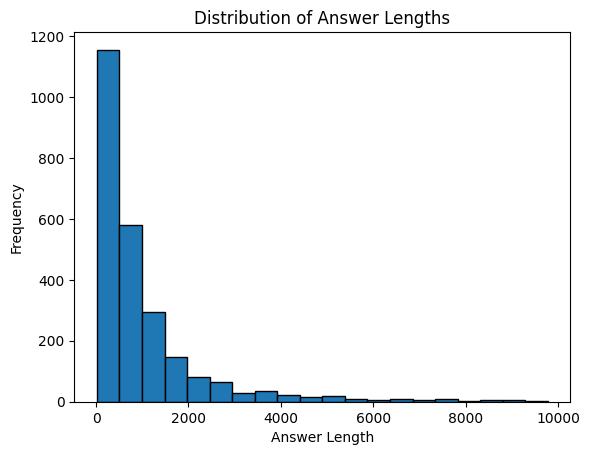

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df_train['Ans_length'], bins=20, edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Lengths')

# Show the plot
plt.show()

In [32]:
threshold_length = 30  # Adjust this threshold based on your data and requirements

# Add a vertical line to indicate the threshold
# plt.axvline(x=threshold_length, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold_length})')

# Show the plot
# plt.legend()
# plt.show()

# Categorize answers based on the threshold
df_train['Answer_Category'] = pd.cut(df_train['Ans_length'], bins=[0, threshold_length, float('inf')], labels=['Simple', 'Complex'])

# Display the DataFrame with answer categories
df_train[['best_answer', 'Ans_length', 'Answer_Category', 'question']]

,best_answer,Ans_length,Answer_Category,question
0,"You're right, in that it's still only a hypoth...",1631,Complex,Why is there so much mystery shrouding the Oor...
1,Probably something to do with how leaders stil...,291,Complex,what is the reasoning behind lifetime salaries...
2,The mods were allowing shills to post blog spa...,673,Complex,the drama/conspiracy going on in /r/politics
3,"It doesn't address your second question, but y...",223,Complex,Why is it that many US States ban cousin marri...
4,Growing up an Inca had varying expectations de...,2094,Complex,Tuesday Trivia | Rituals of Transition
...,...,...,...,...
2495,basically the same way it controls most of its...,1334,Complex,How does the cell control its mitochondria?
2496,The liver tries to keep blood glucose constant...,865,Complex,You often read in sports and fitness literatur...
2497,There's not enough oxygen in the hose/tank. If...,185,Complex,What prevents flame from propane BBQs & weld...
2498,"London: _URL_0_They are not wider, but people ...",97,Complex,why are escalators so narrow?


In [45]:
y = df_train[df_train['Answer_Category']== 'Simple'][['question','best_answer', 'Q_length' ,	'Ans_length' , 'Answer_Category','all_answers','top_answers']]
y

,question,best_answer,Q_length,Ans_length,Answer_Category,all_answers,top_answers
187,how the reddit algorithm works and how it help...,Nice try Zuckerberg,69,19,Simple,[The only real number is the total number of v...,[The only real number is the total number of v...
232,At what point in history did battlefield tacti...,_URL_0_Tons of info here.,110,25,Simple,[_URL_0_\n\nTons of info here.],[]
583,how a 777 can disappear with no trace.,Previously on Lost...,38,21,Simple,[The problem is not determining where it crash...,[The problem is not determining where it crash...
696,why do we have that voice in our head that nar...,_URL_0_ Maybe? I don't know.,73,30,Simple,"[_URL_0_ Maybe? I don't know., I'm only a fi...","[_URL_0_ Maybe? I don't know., I'm only a fi..."
1558,why do my teet hurt when i eat sugary candy (t...,Sounds like cavity creeps,69,25,Simple,"[Sounds like cavity creeps, Almost certainly a...",[]
1629,how do you fix a severed artery/vein?,Have you called 911/000 yet?,37,29,Simple,[Have you called 911/000 yet? ],[]


In [53]:
display(y.loc[187, 'question'])
print('\n')
display(y.loc[187, 'best_answer'])
print('\n')
display(y.loc[187, 'all_answers'])
print('\n')
display(y.loc[187, 'top_answers'])

'how the reddit algorithm works and how it helps prevent against spam.'

'Nice try Zuckerberg'

array(["The only real number is the total number of votes. Everything else is complete nonsense, as mentioned [here](_URL_0_) by one of the site's administrators.",
       "The way it prevents spam is that it means they can secretly lock accounts that are mass up-voting or down-voting (maybe to push an agenda like advertising or something), without informing this account that it has been locked. The person/bot continues to up-vote and down-vote, thinking their votes are counted (because of the fuzzing), but really, they're not having any effect on the actual score. This is so the spammer doesn't realise they have been locked and simply make a new account.",
       'Nice try Zuckerberg',
       'Let\'s say you are playing a game...the Super Bowl is coming up, so let\'s say American Football.\n\nDuring this game, they don\'t tell you the score...in fact, the don\'t tell you the rules for scoring...you don\'t know how much a touchdown or field goal are worth, all you know is going down th

array(["The only real number is the total number of votes. Everything else is complete nonsense, as mentioned [here](_URL_0_) by one of the site's administrators.",
       "The way it prevents spam is that it means they can secretly lock accounts that are mass up-voting or down-voting (maybe to push an agenda like advertising or something), without informing this account that it has been locked. The person/bot continues to up-vote and down-vote, thinking their votes are counted (because of the fuzzing), but really, they're not having any effect on the actual score. This is so the spammer doesn't realise they have been locked and simply make a new account.",
       'Nice try Zuckerberg'], dtype=object)

In [54]:
display(y.loc[232, 'question'])
print('\n')
display(y.loc[232, 'best_answer'])
print('\n')
display(y.loc[232, 'all_answers'])
print('\n')
display(y.loc[232, 'top_answers'])

"At what point in history did battlefield tactics transition from those during Napoleon's time to those of WWI?"

'_URL_0_Tons of info here.'

array(['_URL_0_\n\nTons of info here.'], dtype=object)

array([], dtype=object)

In [55]:
display(y.loc[583, 'question'])
print('\n')
display(y.loc[583, 'best_answer'])
print('\n')
display(y.loc[583, 'all_answers'])
print('\n')
display(y.loc[583, 'top_answers'])

'how a 777 can disappear with no trace.'

'Previously on Lost...'

array(['The problem is not determining where it crashed.  It is finding out where it is now, currents will rapidly change the position of whatever remains of that plane.  Its a big ocean and very hard to predict exactly where the current will take it.',
       "1: There is a radar floor, which when you go below it you 'disappear' so if the plane went below it and flew for another 7 miles you need to find it.\n\n2: Much of the plane sinks. Engines, etc can drag down large portions of the plane when broken up. \n\n3: Of the remaining debris, ocean moves shit around. Look up the Yellow Duck spill.\n\n4: in regards to your comments about satellite / radar coverage to detect ICBM's etc. Those are targeted. No-one expects a plane to disappear for no reason.\n\nExtra Point: the best theory I have heard is that according to some records the one wing of the plane was damaged in a taxing accident. -- if that resulted in a hairline fracture of the wing, the whole thing could have ripped off in th

array(['The problem is not determining where it crashed.  It is finding out where it is now, currents will rapidly change the position of whatever remains of that plane.  Its a big ocean and very hard to predict exactly where the current will take it.',
       'Previously on Lost...'], dtype=object)

In [57]:
display(y.loc[696, 'question'])
print('*****************\n*****************')
display(y.loc[696, 'best_answer'])
print('*****************\n*****************')
display(y.loc[696, 'all_answers'])
print('*****************\n*****************')
display(y.loc[696, 'top_answers'])

'why do we have that voice in our head that narrates what we are thinking?'

*****************
*****************


"_URL_0_  Maybe?  I don't know."

*****************
*****************


array(["_URL_0_  Maybe?  I don't know.",
       "I'm only a first year studying educational psychology, but I'm pretty sure this relates to Lev Vygotsky's ideas about language. Language is one of the most important mental tools, as it plays a major role in socialisation as well as cognition. We use it to regulate our thoughts and structure our intellectual activity. When you use the voice in your head to narrate a thought process, it's called private/ internalised speech. This can be observed in young children, who often talk to themselves aloud to help them work out a problem. This is gradually internalised as a child develops, but even as an adult sometimes reading something out loud can help you understand it. \n",
       'Remember, not everybody has that.\n\nThe idea of an "internal voice" is fascinating to me, precisely because I\'ve never had one. I always thought it was a poetic phrase (similar to saying your heart "told" you something), not that people literally have a voice in

*****************
*****************


array(["_URL_0_  Maybe?  I don't know.",
       "I'm only a first year studying educational psychology, but I'm pretty sure this relates to Lev Vygotsky's ideas about language. Language is one of the most important mental tools, as it plays a major role in socialisation as well as cognition. We use it to regulate our thoughts and structure our intellectual activity. When you use the voice in your head to narrate a thought process, it's called private/ internalised speech. This can be observed in young children, who often talk to themselves aloud to help them work out a problem. This is gradually internalised as a child develops, but even as an adult sometimes reading something out loud can help you understand it. \n",
       'Remember, not everybody has that.\n\nThe idea of an "internal voice" is fascinating to me, precisely because I\'ve never had one. I always thought it was a poetic phrase (similar to saying your heart "told" you something), not that people literally have a voice in

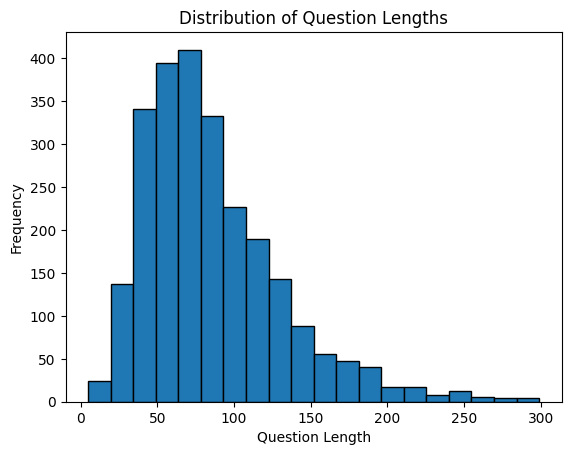

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df_train['Q_length'], bins=20, edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')

# Show the plot
plt.show()

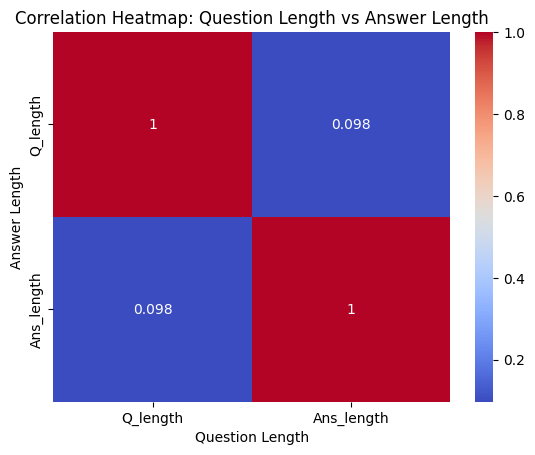

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_train[['Q_length', 'Ans_length']].corr(), annot=True, cmap='coolwarm')

# Add labels and title to the plot
plt.xlabel('Question Length')
plt.ylabel('Answer Length')
plt.title('Correlation Heatmap: Question Length vs Answer Length')

# Show the plot
plt.show()

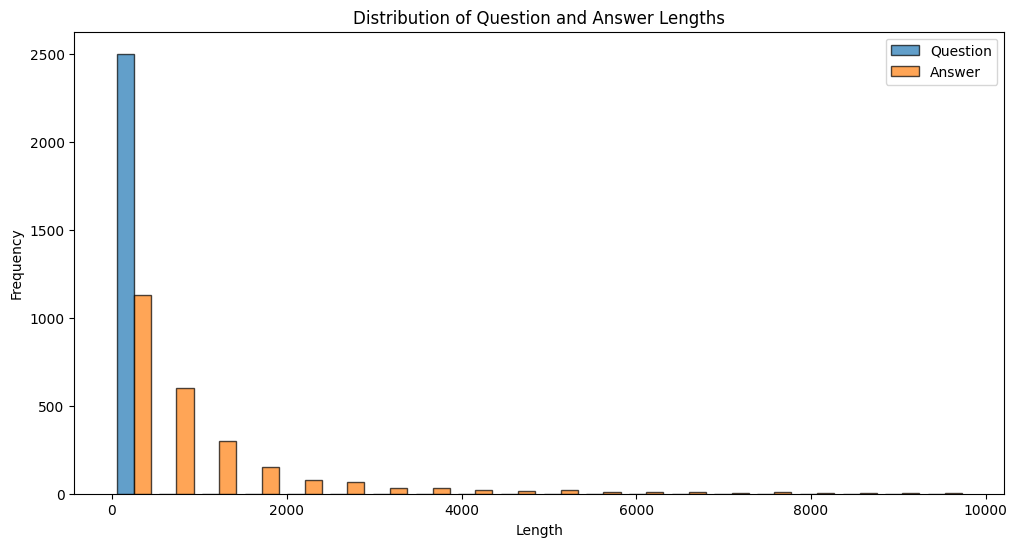

In [27]:
# Create a side-by-side histogram
plt.figure(figsize=(12, 6))
plt.hist([df_train['Q_length'], df_train['Ans_length']], bins=20, edgecolor='black', alpha=0.7, label=['Question', 'Answer'])

# Add labels and title to the plot
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question and Answer Lengths')

# Add a legend
plt.legend()

# Show the plot
plt.show()

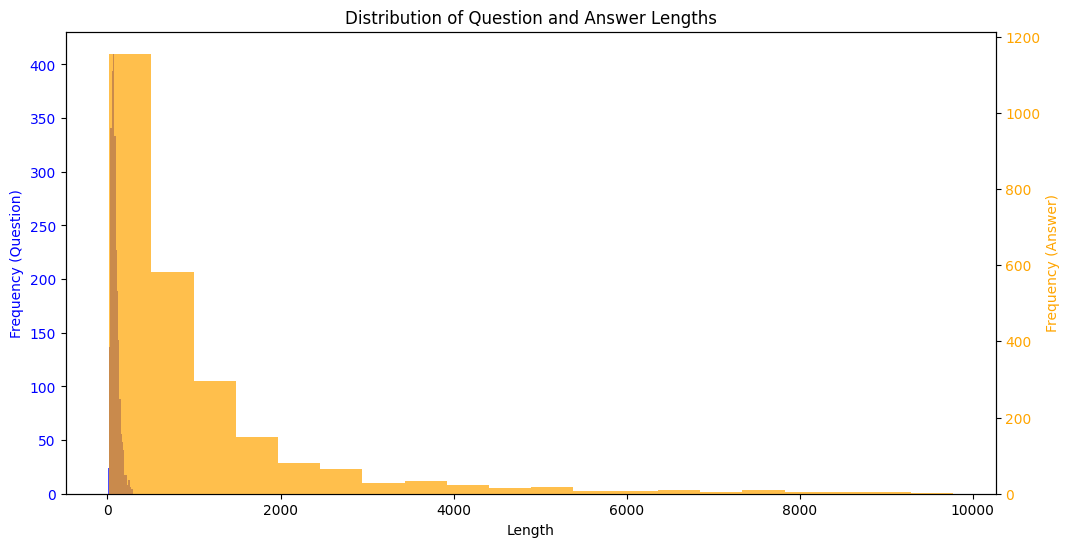

In [28]:
# Create a side-by-side histogram with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the question lengths on the left y-axis
ax1.hist(df_train['Q_length'], bins=20, color='blue', alpha=0.7, label='Question')
ax1.set_xlabel('Length')
ax1.set_ylabel('Frequency (Question)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the answer lengths on the right y-axis
ax2.hist(df_train['Ans_length'], bins=20, color='orange', alpha=0.7, label='Answer')
ax2.set_ylabel('Frequency (Answer)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title
plt.title('Distribution of Question and Answer Lengths')

# Show the plot
plt.show()